In [18]:
import matplotlib.pyplot as plt
from random import shuffle, seed
import numpy as np
from PIL import Image, ImageOps
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [2]:
# CONFIGURATIONS
IMAGE_SIZE = 224
IMAGE_DIM = (224, 224)
TEST = 'test'
DIR_TRAIN_DISEASE = 'train/disease'
DIR_TRAIN_NORMAL = 'train/normal'

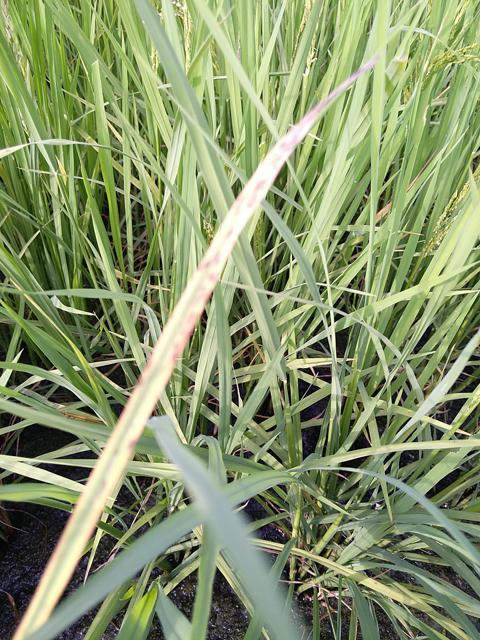

In [3]:
Image.open(DIR_TRAIN_DISEASE+'/100001.jpg')

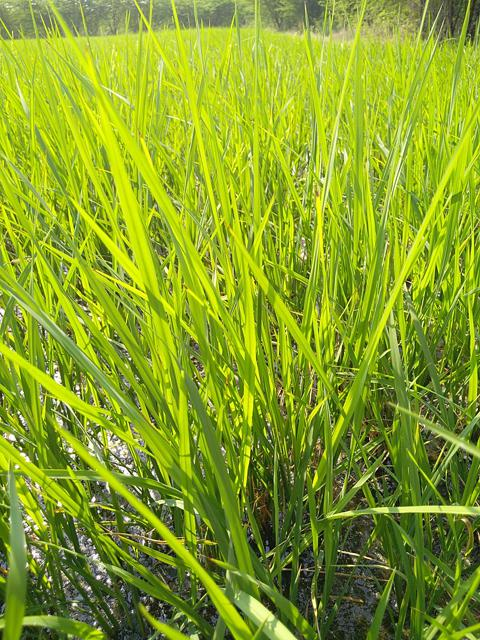

In [4]:
Image.open(DIR_TRAIN_NORMAL+'/100053.jpg')

#### No need to flatten grayscale image as they are 2d

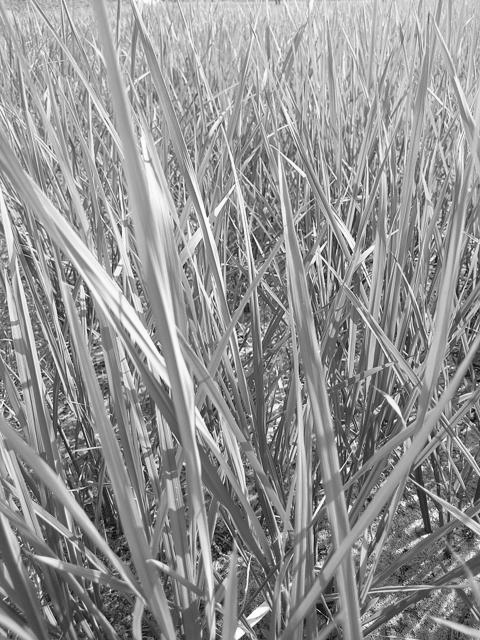

In [7]:
# basic changes
normal = Image.open('train/normal/100002.jpg')
ImageOps.grayscale(normal)

In [9]:
normal = Image.open('train/normal/100002.jpg')
normal = normal.resize((4, 4))
normal = ImageOps.grayscale(normal)
normal

In [10]:
normal_array_gray = np.array(normal)
normal_array_gray

array([[174, 175, 178, 179],
       [165, 165, 143, 149],
       [139, 143, 127, 130],
       [114, 121, 124, 119]], dtype=uint8)

In [11]:
normal_array_gray.flatten()

array([174, 175, 178, 179, 165, 165, 143, 149, 139, 143, 127, 130, 114,
       121, 124, 119], dtype=uint8)

In [13]:
normal = Image.open('train/normal/100002.jpg')
normal = normal.resize((4, 4))
normal

In [14]:
normal_array_colored = np.array(normal)
normal_array_colored

array([[[172, 194,  79],
        [174, 197,  67],
        [178, 201,  58],
        [178, 204,  52]],

       [[164, 183,  79],
        [165, 182,  77],
        [142, 160,  61],
        [145, 172,  43]],

       [[136, 155,  63],
        [139, 160,  64],
        [124, 142,  57],
        [127, 149,  42]],

       [[108, 130,  49],
        [115, 138,  51],
        [119, 139,  56],
        [118, 128,  75]]], dtype=uint8)

#### Flattening color image

In [15]:
normal_array_colored.flatten()

array([172, 194,  79, 174, 197,  67, 178, 201,  58, 178, 204,  52, 164,
       183,  79, 165, 182,  77, 142, 160,  61, 145, 172,  43, 136, 155,
        63, 139, 160,  64, 124, 142,  57, 127, 149,  42, 108, 130,  49,
       115, 138,  51, 119, 139,  56, 118, 128,  75], dtype=uint8)

## Labeling

In [16]:
import os
categories = os.listdir('train')
train = []
for category in categories:
    imgs = os.listdir(os.path.join('train',category))
    for img in imgs:
        imgx = Image.open(os.path.join('train', category, img))
        imgx = np.array(imgx).flatten()
        train.append([imgx, categories.index(category)])
train
    

[[array([160, 174, 121, ...,  83, 111,  89], dtype=uint8), 0],
 [array([110, 136,  73, ..., 207, 225, 183], dtype=uint8), 0],
 [array([181, 185, 124, ...,  52,  73,  14], dtype=uint8), 0],
 [array([216, 244, 169, ..., 140, 173, 104], dtype=uint8), 0],
 [array([116, 162,  14, ...,  98, 133,   5], dtype=uint8), 0],
 [array([174, 204,  72, ...,  13,  11,   0], dtype=uint8), 0],
 [array([145, 185,  60, ...,  21,  36,   7], dtype=uint8), 0],
 [array([126, 155,  36, ..., 115, 138,  68], dtype=uint8), 0],
 [array([ 92, 137,   8, ...,  63,  66,  47], dtype=uint8), 0],
 [array([217, 220, 213, ...,  21,  69,   0], dtype=uint8), 0],
 [array([195, 227, 144, ...,  82,  78,  49], dtype=uint8), 0],
 [array([162, 215,  45, ..., 144, 198,  87], dtype=uint8), 0],
 [array([180, 189,  38, ..., 111, 127,  52], dtype=uint8), 0],
 [array([ 99, 143,  30, ...,  80, 129,   3], dtype=uint8), 0],
 [array([134, 162,  39, ...,  22,  12,  39], dtype=uint8), 0],
 [array([165, 204,  25, ...,  53,  53,  51], dtype=uint

In [19]:
seed(42)
shuffle(train)
train

[[array([130, 157,  26, ..., 100, 125,  41], dtype=uint8), 1],
 [array([185, 219,   0, ...,  55,  72,  30], dtype=uint8), 0],
 [array([252, 254, 253, ...,  46,  68,  21], dtype=uint8), 0],
 [array([181, 185, 124, ...,  52,  73,  14], dtype=uint8), 0],
 [array([139, 179,  31, ...,  78, 120,  70], dtype=uint8), 1],
 [array([168, 207,  30, ..., 144, 156,  90], dtype=uint8), 0],
 [array([114, 150,  76, ...,  25,  39,  13], dtype=uint8), 0],
 [array([172, 188, 113, ...,  32,  43,  61], dtype=uint8), 0],
 [array([126, 155,  36, ..., 115, 138,  68], dtype=uint8), 0],
 [array([238, 255, 248, ..., 110, 113,  84], dtype=uint8), 1],
 [array([168, 196,  34, ...,  51,  91,   3], dtype=uint8), 0],
 [array([157, 180,  76, ...,  43,  72,  26], dtype=uint8), 0],
 [array([155, 194,  27, ...,  40,  80,  17], dtype=uint8), 1],
 [array([159, 179,  56, ...,   9,  13,   0], dtype=uint8), 1],
 [array([226, 242, 133, ..., 203, 227, 133], dtype=uint8), 1],
 [array([198, 211,   0, ...,  21,  19,   0], dtype=uint

In [20]:
feature = []
label = []
for feat, labl in train:
    feature.append(feat)
    label.append(labl)
X = feature
y = label

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
model.score(X_test, y_test)

0.75

In [24]:
model.predict(X_test[:len(X_test)])

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])